# K-Means Algorithm


K-means is a type of unsupervised learning method designed to group data into clusters based on their similarities. The algorithm creates a set number (k) of clusters within a dataset by considering the distances between data points. It repeatedly assigns each data point to the closest cluster center and then recalculates the cluster centers as the mean of the data points assigned to each cluster. This cycle continues until the cluster assignments stabilize or a predefined number of iterations is completed.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the custom functions
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions_algorithms import *

In [2]:
# Import the dataset
customer_info_final = pd.read_csv('../../custumer_info_final_with_%.csv')

In [3]:
# Check the dataset
customer_info_final.head()

,Unnamed: 0,customer_age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_lifetime_spend_fish,percentage_lifetime_spend_vegetables,percentage_lifetime_spend_nonalcohol_drinks,percentage_lifetime_spend_alcohol_drinks,percentage_lifetime_spend_meat,percentage_lifetime_spend_hygiene,percentage_lifetime_spend_videogames,percentage_lifetime_spend_petfood,avg_spend_per_store,loyalty_years
0,0,60,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,484.0,...,0.095753,0.011426,0.014259,0.022262,0.052551,0.051323,0.093156,0.059350,21179.500000,14.0
1,1,55,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,301.0,...,0.132786,0.017030,0.048204,0.097935,0.025233,0.073890,0.085092,0.114173,5891.666667,15.0
2,2,83,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,153.0,...,0.009367,0.009491,0.015632,0.003722,0.017679,0.003288,0.000000,0.256498,16121.000000,17.0
3,3,23,0.0,0.0,0.0,1.0,697.0,570.0,14.8,8.0,...,0.032818,0.001526,0.006297,0.540546,0.010303,0.112002,0.042549,0.012211,5241.000000,0.0
4,4,65,1.0,1.0,0.0,2.0,13419.0,12029.0,18.0,439.8,...,0.104672,0.010350,0.017532,0.031133,0.034334,0.033063,0.101989,0.068079,21247.400000,19.0


In [4]:
# Drop the first column
customer_info_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Scale the data using MinMaxScaler
customer_info_scaled = MinMaxScaler().fit_transform(customer_info_final)

In [7]:
# Initialize an empty list to store the dispersion values
dispersion = []

# Loop through a range of values for the number of clusters from 1 to 49
for k in range(1, 50):
    # Initialize the KMeans model with k clusters and a fixed random state for reproducibility
    k_means = KMeans(n_clusters=k, random_state=42).fit(customer_info_scaled)
    
    # Append the inertia to the dispersion list
    dispersion.append(k_means.inertia_)


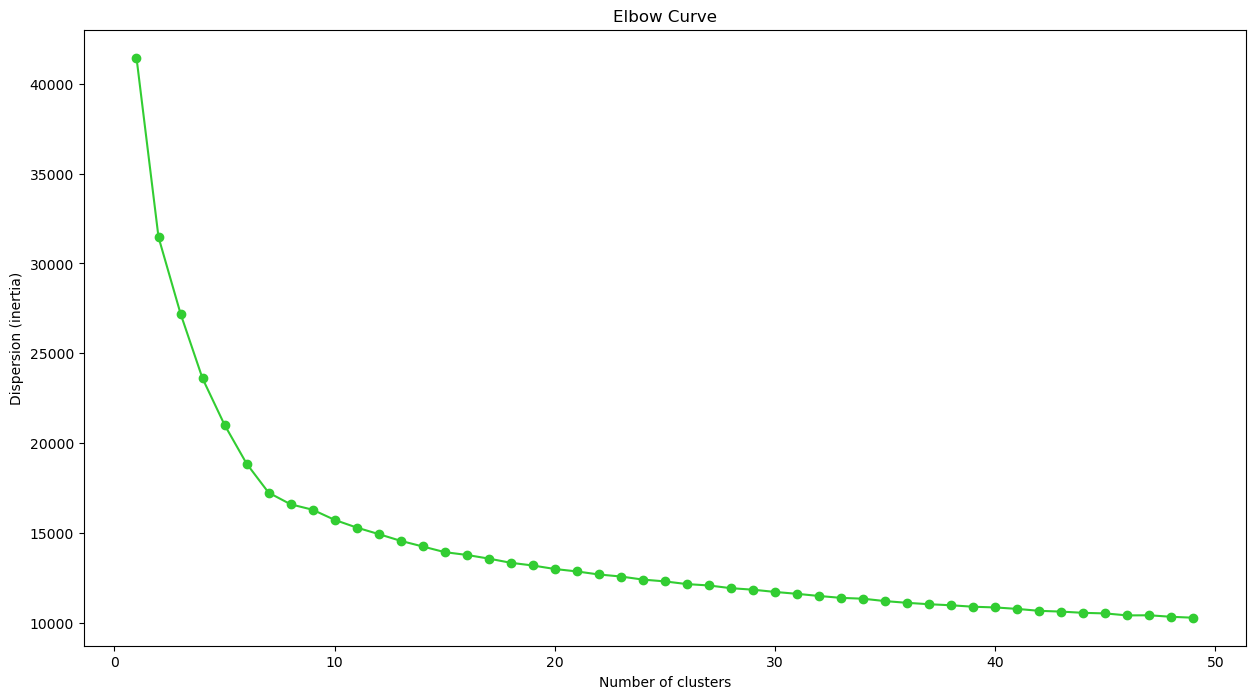

In [19]:
# Elbow method - to decide the best value for k
plt.figure(figsize=(15, 8))
plt.plot(range(1, 50), dispersion, marker='o', color = 'limegreen')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.title('Elbow Curve')
plt.show()

In [9]:
# Compute the silhouette scores to better define the optimum value of k
range_n_clusters = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
silhouette_scores = compute_silhouette_scores(customer_info_scaled, range_n_clusters)
print(silhouette_scores)

For n_clusters = 4 The average silhouette_score is: 0.22365356891704935
For n_clusters = 5 The average silhouette_score is: 0.23966300935051246
For n_clusters = 6 The average silhouette_score is: 0.24283391396218948
For n_clusters = 7 The average silhouette_score is: 0.26329625078821195
For n_clusters = 8 The average silhouette_score is: 0.2671081863252334
For n_clusters = 9 The average silhouette_score is: 0.21141435067837297
For n_clusters = 10 The average silhouette_score is: 0.22885873451447392
For n_clusters = 11 The average silhouette_score is: 0.212215719647705
For n_clusters = 12 The average silhouette_score is: 0.18878380538577416
For n_clusters = 13 The average silhouette_score is: 0.17839015472062164
For n_clusters = 14 The average silhouette_score is: 0.17820837549775748
[0.22365356891704935, 0.23966300935051246, 0.24283391396218948, 0.26329625078821195, 0.2671081863252334, 0.21141435067837297, 0.22885873451447392, 0.212215719647705, 0.18878380538577416, 0.17839015472062164

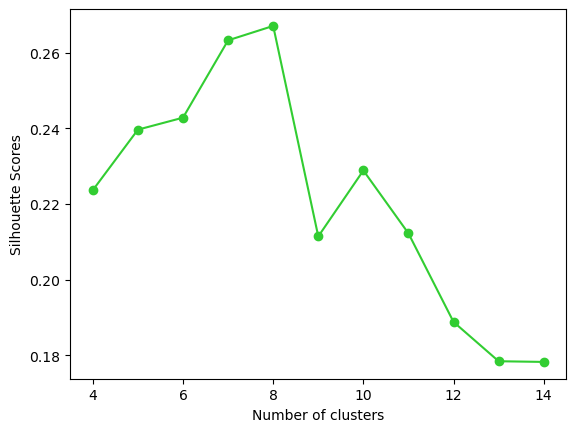

In [10]:
# Plot a graph for better visualization
plt.plot(range(4,15), silhouette_scores, marker='o', color='limegreen')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

By observing the graph we conclude that the optimal number of clusters is 8 with a silhouette score of approximately 0.267.

In [12]:
# Apply KMeans clustering to the scaled data
k_means_solution = KMeans(n_clusters=8, random_state=42).fit(customer_info_scaled)
# Assign the cluster labels to a new column in the customer_info_final DataFrame
customer_info_final['cluster_kmeans'] = k_means_solution.predict(customer_info_scaled)

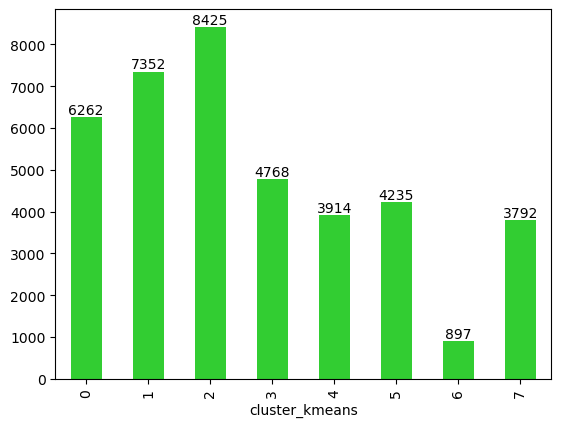

In [14]:
# Group the data by cluster and calculate the size of each group
cluster_counts = customer_info_final.groupby('cluster_kmeans').size()

# Create the bar plot
ax = cluster_counts.plot(kind='bar', color='limegreen')

for i, count in enumerate(cluster_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### UMAP

UMAP, also known as Uniform Manifold Approximation Projection, was utilized as a visualization technique to represent the computed clusters.

In [15]:
# Save the clusters labels
k_means_cluster = customer_info_final['cluster_kmeans']

In [16]:
# Initialize a UMAP object
umap_object = umap.UMAP(n_neighbors=500, min_dist=0.8, random_state=42)

In [17]:
# Fit the UMAP object to the scaled data and transform it
umap_embedding = umap_object.fit_transform(customer_info_scaled)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


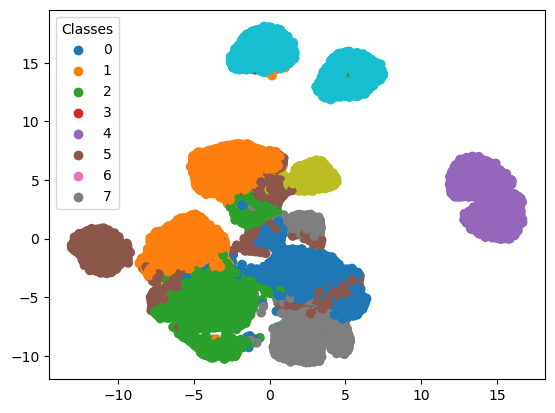

In [20]:
# Visualize the result
visualize_dimensionality_reduction(umap_embedding, np.array(k_means_cluster))